In [2]:
from pymongo import MongoClient
import pandas as pd
import re
from src.feature_building import count_keyword_123grams, token_pipeline
from src.data_processing import get_recipe_features, keyword_hierarchy
from nltk.util import ngrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [3]:
client = MongoClient()
db = client['recipes']
coll = db.eda_cookies

In [4]:
regx_cookies = re.compile("cookies", re.IGNORECASE)
regx_choc_chip = re.compile("chocolate.chip.cookies", re.IGNORECASE)
regx_shortbread = re.compile("shortbread", re.IGNORECASE)
regx_snickerdoodle = re.compile("(snickerdoodle|snicker.doodle)", re.IGNORECASE)

In [5]:
curs = coll.find({'label': regx_cookies})
precedence = keyword_hierarchy(curs, 'src/')

In [6]:
curs = coll.find({'label': regx_cookies})
df_cookies = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])

In [7]:
df_cookies.shape

(2254, 245)

In [8]:
curs = coll.find({'label': regx_choc_chip})
df_choc_chip = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])

In [9]:
df_choc_chip.shape

(234, 137)

In [10]:
df_choc_chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Columns: 137 entries, agav to zucchini
dtypes: float64(135), object(2)
memory usage: 250.5+ KB


In [11]:
df_choc_chip.describe().T.sort_values('count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
total_wgt,234.0,1205.777072,437.080189,355.529823,834.512483,1183.868545,1463.830548,2600.263478
salt,217.0,0.003453,0.001901,0.000000,0.002244,0.003265,0.004219,0.011136
butter,201.0,0.148077,0.041931,0.034335,0.124806,0.150883,0.171968,0.350340
bake soda,200.0,0.003239,0.001440,0.001057,0.002285,0.003087,0.003787,0.012252
flour,199.0,0.218023,0.076972,0.008883,0.182759,0.215608,0.242659,0.594979
egg,195.0,0.062469,0.021713,0.020077,0.047318,0.059981,0.073329,0.185538
sugar,189.0,0.123548,0.070397,0.030060,0.084116,0.107258,0.144133,0.542071
brown sugar,181.0,0.132852,0.050064,0.037120,0.098314,0.125773,0.161537,0.303576
vanilla extract,166.0,0.007380,0.006845,0.001411,0.003678,0.005332,0.008033,0.043225
chocol,68.0,0.219042,0.108482,0.000000,0.144766,0.223889,0.285588,0.590456


In [12]:
df_choco_chip_fill = df_choc_chip.fillna(0)

In [13]:
curs = coll.find({'label': regx_shortbread})
df_shortbread = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])
df_shortbread_fill = df_shortbread.fillna(0)

In [14]:
df_shortbread.describe().T.sort_values('count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
total_wgt,140.0,787.199661,396.071491,279.550000,550.167629,695.037076,916.717181,2487.511453
butter,132.0,0.289613,0.088176,0.058037,0.239121,0.300822,0.345375,0.770836
flour,122.0,0.338890,0.115623,0.032475,0.280514,0.359586,0.411525,0.723066
salt,109.0,0.008104,0.028494,0.000302,0.002114,0.003774,0.005965,0.243128
sugar,86.0,0.149153,0.071784,0.011858,0.110785,0.155832,0.187400,0.376946
vanilla extract,54.0,0.005912,0.003695,0.000891,0.003360,0.005624,0.007462,0.023377
powder sugar,29.0,0.148237,0.068867,0.042900,0.110855,0.146605,0.176626,0.373726
confection sugar,28.0,0.114556,0.043892,0.016245,0.103245,0.113508,0.132705,0.200236
bake powder,20.0,0.003875,0.002976,0.000310,0.001862,0.003123,0.004553,0.011075
egg yolk,19.0,0.035753,0.014808,0.019913,0.026155,0.030509,0.039929,0.073326


In [15]:
curs = coll.find({'label': regx_snickerdoodle})
df_snickerdoodle = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])
df_snickerdoodle_fill = df_snickerdoodle.fillna(0)
df_snickerdoodle.describe().T.sort_values('count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
total_wgt,100.0,981.502277,359.940425,366.995475,779.332330,978.117757,1068.365103,2764.199999
sugar,97.0,0.297725,0.114758,0.011858,0.237764,0.329087,0.351168,0.830675
egg,96.0,0.085919,0.020368,0.034949,0.076428,0.087209,0.096851,0.136241
flour,92.0,0.319053,0.087308,0.008801,0.306755,0.336813,0.357350,0.490285
cinnamon,86.0,0.008841,0.013600,0.001497,0.004817,0.005763,0.008572,0.119535
butter,85.0,0.164278,0.057120,0.058110,0.116024,0.166352,0.214952,0.361791
salt,84.0,0.002284,0.001346,0.000314,0.001456,0.001985,0.002911,0.007184
bake soda,79.0,0.004227,0.001589,0.001119,0.003708,0.004450,0.004704,0.012204
cream tartar,62.0,0.004863,0.002131,0.000365,0.003391,0.005763,0.006135,0.010246
vanilla extract,42.0,0.005897,0.002252,0.002214,0.004141,0.005494,0.007763,0.011491


In [16]:
df_snickerdoodle.shape

(100, 73)

In [17]:
def plot_2class_2ingred(ax, df1, df2, ingred1, ingred2, label1, label2):
    ax.scatter(df1[ingred1], df1[ingred2], label=label1, alpha=0.7)
    ax.scatter(df2[ingred1], df2[ingred2], label=label2, alpha=0.7)
    ax.legend()
    ax.set_xlabel("% mass {}".format(ingred1))
    ax.set_ylabel("% mass {}".format(ingred2))

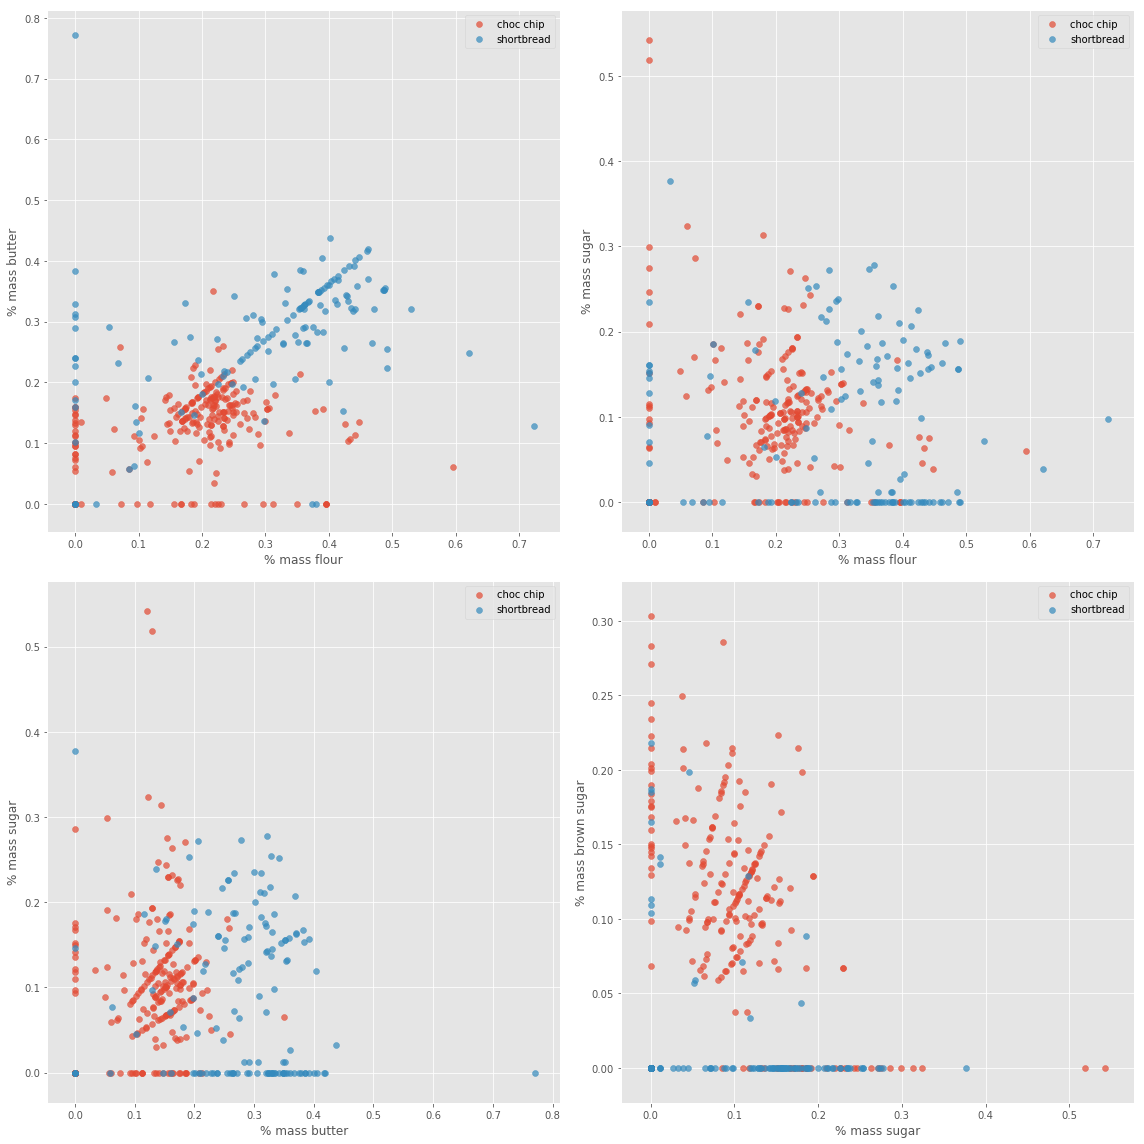

In [18]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2,2, figsize=(16,16))
plot_2class_2ingred(axs[0,0], df_choco_chip_fill, df_shortbread_fill, 'flour', 'butter', 'choc chip', 'shortbread')
plot_2class_2ingred(axs[0,1], df_choco_chip_fill, df_shortbread_fill, 'flour', 'sugar', 'choc chip', 'shortbread')
plot_2class_2ingred(axs[1,0], df_choco_chip_fill, df_shortbread_fill, 'butter', 'sugar', 'choc chip', 'shortbread')
plot_2class_2ingred(axs[1,1], df_choco_chip_fill, df_shortbread_fill, 'sugar', 'brown sugar', 'choc chip', 'shortbread')
plt.tight_layout()

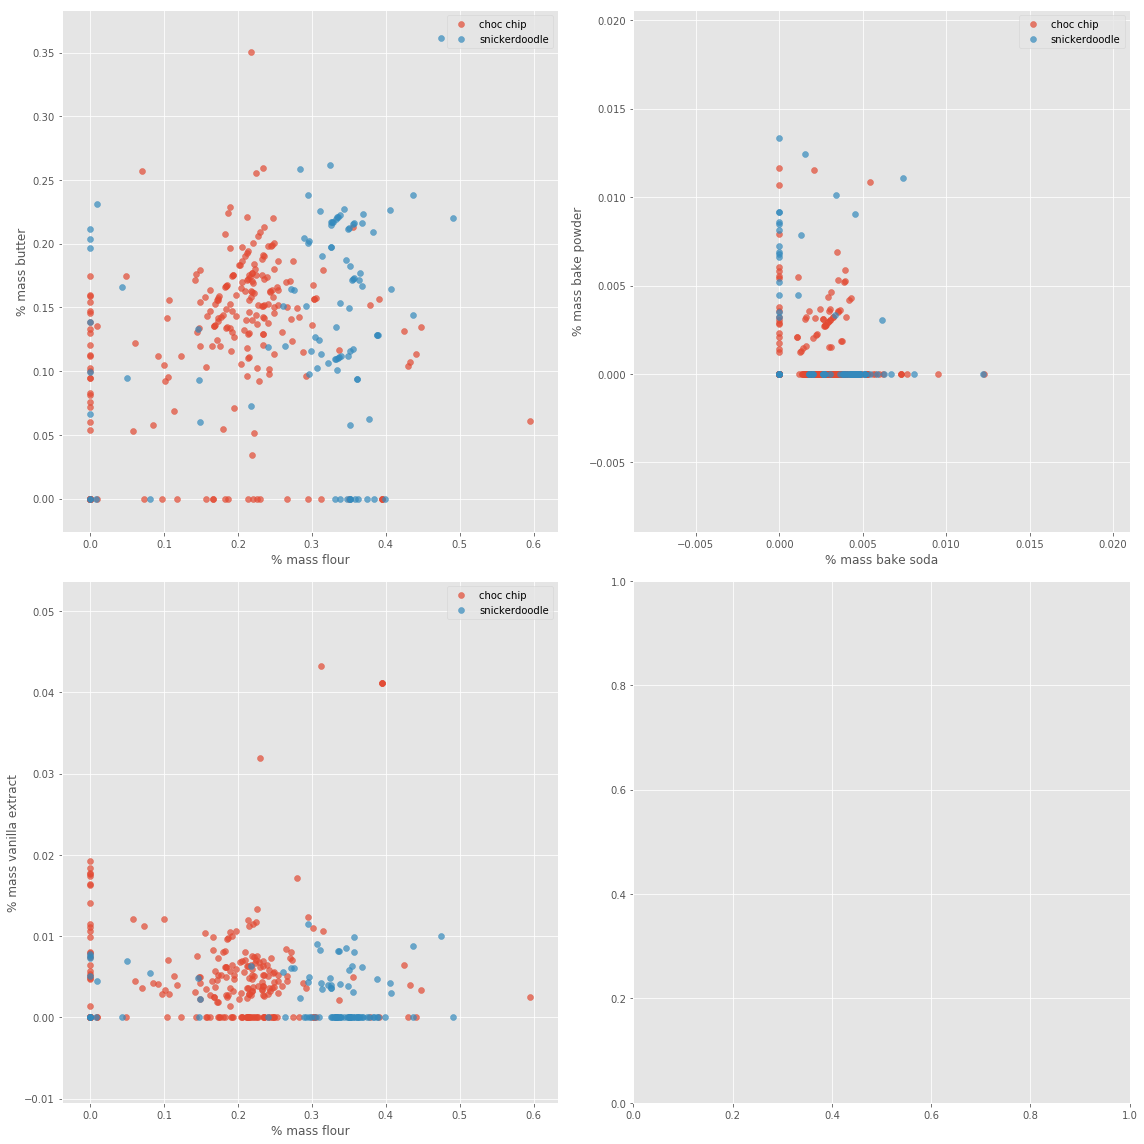

In [19]:
fig, axs = plt.subplots(2,2, figsize=(16,16))
plot_2class_2ingred(axs[0,0], df_choco_chip_fill, df_snickerdoodle_fill, 'flour', 'butter', 'choc chip', 'snickerdoodle')
plot_2class_2ingred(axs[0,1], df_choco_chip_fill, df_snickerdoodle_fill, 'bake soda', 'bake powder', 'choc chip', 'snickerdoodle')
plot_2class_2ingred(axs[1,0], df_choco_chip_fill, df_snickerdoodle_fill, 'flour', 'vanilla extract', 'choc chip', 'snickerdoodle')
# plot_2class_2ingred(axs[1,1], df_choco_chip_fill, df_shortbread_fill, 'sugar', 'brown sugar', 'choc chip', 'shortbread')
plt.tight_layout()

In [20]:
top_10 = list(df_cookies.notnull().sum(axis=0).sort_values(ascending=False).index[1:11])

In [21]:
df_top_10 = df_cookies[top_10].fillna(0)

In [22]:
# pd.plotting.scatter_matrix(df_cookies[top_10], figsize=(18,18));

In [23]:
# pd.plotting.scatter_matrix(df_top_10 / df_top_10.std(), figsize=(18,18));

In [24]:
# df_cookies.describe().T.sort_values('count', ascending=False)

In [25]:
common_ingred = df_cookies.columns[df_cookies.notnull().sum() >= 20]

In [26]:
'label' in common_ingred

True

In [27]:
df_common = df_cookies[common_ingred].drop('label', axis=1).fillna(0)
df_scaled = df_common / df_common.std()

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
dist_mat = squareform(pdist(df_scaled, metric='cosine'))

In [ ]:
dist_mat.shape

In [ ]:
labels = df_cookies['label']

In [ ]:
def walk_through_recipes(dist_mat, steps, labels, start=None):
    currernt = start
    visited = set()
    if not start:
        current = np.random.randint(0, dist_mat.shape[0])
    for _ in xrange(steps):
        print labels[current] + ' ===>'
        visited.add(current)
        nearest = np.argsort(dist_mat[current])
        for neighbor in nearest:
            if neighbor not in visited:
                current = neighbor
                break

In [ ]:
walk_through_recipes(dist_mat, 5, labels)

In [ ]:
walk_through_recipes(dist_mat, 5, labels)

In [ ]:
walk_through_recipes(dist_mat, 5, labels)

In [ ]:
walk_through_recipes(dist_mat, 10, labels)

In [ ]:
df_top_10.mean().index

In [ ]:
coll.find_one()

In [ ]:
fig, axs = plt.subplots(5,2, figsize=(10,16))
for (name, ser), ax in zip(df_top_10.iteritems(), axs.flatten()):
    non0 = ser[ser > 0]
    ax.hist(non0, bins=16)
    ax.set_title(name)
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(5,2, figsize=(10,16))
for (name, ser), ax in zip(df_top_10.iteritems(), axs.flatten()):
    non0 = ser[ser > 0]
    scaled = non0 / non0.median()
    ax.hist(scaled, bins=16)
    ax.set_title(name)
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(5,2, figsize=(10,16))
for (name, ser), ax in zip(df_top_10.iteritems(), axs.flatten()):
    non0 = ser[ser > 0]
    scaled = non0 / non0.mean()
    ax.hist(scaled, bins=16)
    ax.set_title(name)
plt.tight_layout()

In [ ]:
df